# Recommendation Systems

## Demographic Filtering

In [5]:
dem1=df1.copy()

1. we need a metric to score or rate movie
2. Calculate the score for every movie
3. Sort the scores and recommend the best rated movie to the users.

IMDB's weighted rating (wr):

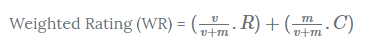

In [6]:

PATH = "/Users/alinikkhah/Downloads/wr.png"
Image(filename = PATH, width=400, height=400)

where,

- v is the number of votes for the movie;
- m is the minimum votes required to be listed in the chart;
- R is the average rating of the movie; And
- C is the mean vote across the whole report

In [7]:
C=dem1['vote_average'].mean()
C

6.110155555555557

In [8]:
# m: 99th percentile of number of votes to be considered on popular movies
m= dem1['vote_count'].quantile(0.99)
m

3001.1600000000035

In [9]:
dem2=dem1.copy().loc[dem1['vote_count']>=m]
dem2.shape

(90, 24)

We see that there are 455 movies which qualify to be in this list.

In [10]:
def imdb_weighted_rating(df, m=m, C=C):
    v = df['vote_count']
    R = df['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
dem2['imdb_score']=dem2.apply(imdb_weighted_rating, axis=1)

In [12]:
dem2=dem2.sort_values('imdb_score',ascending=False)

In [13]:
dem3=dem2[['original_title','vote_count','vote_average','imdb_score','genres']].reset_index(drop=True)
dem3.head(20)

,original_title,vote_count,vote_average,imdb_score,genres
0,The Shawshank Redemption,8358.0,8.5,7.868588,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
1,Fight Club,9678.0,8.3,7.781663,"[{'id': 18, 'name': 'Drama'}]"
2,Pulp Fiction,8670.0,8.3,7.736896,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n..."
3,The Godfather,6024.0,8.5,7.705299,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
4,Forrest Gump,8147.0,8.2,7.637400,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
5,The Lord of the Rings: The Return of the King,8226.0,8.1,7.568090,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
6,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.523110,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
7,The Empire Strikes Back,5998.0,8.2,7.503051,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '..."
8,Star Wars,6778.0,8.1,7.489330,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '..."
9,The Lord of the Rings: The Two Towers,7641.0,8.0,7.467051,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."


### Popularity for Specific Genres

In [14]:
dem4=df1.copy()

In [15]:
dem4['genres'] = dem4['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [16]:
s = dem4.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
dem44 = dem4.drop('genres', axis=1).join(s)

<ipython-input-16-2ff3fe5e5606>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = dem4.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)


In [17]:
def popularity_genres(genre):
    dem5 = dem44[dem44['genre'] == genre]
    C=dem5['vote_average'].mean()
    m= dem5['vote_count'].quantile(0.99)
    dem6=dem5.copy().loc[dem5['vote_count']>=m]
    dem6['imdb_score']=dem6.apply(imdb_weighted_rating, axis=1)
    dem6=dem6.sort_values('imdb_score',ascending=False)
    dem7=dem6[['original_title','vote_count','vote_average','imdb_score','genre']].reset_index(drop=True)
    return dem7

In [18]:
popularity_genres('Romance').head()

,original_title,vote_count,vote_average,imdb_score,genre
0,Forrest Gump,8147.0,8.2,7.637400,Romance
1,Titanic,7770.0,7.5,7.112749,Romance
2,Eternal Sunshine of the Spotless Mind,3758.0,7.9,7.105284,Romance
3,Le fabuleux destin d'Amélie Poulain,3403.0,7.8,7.008094,Romance
4,The Notebook,3163.0,7.7,6.925948,Romance


In [19]:
popularity_genres('Drama').head(10)

,original_title,vote_count,vote_average,imdb_score,genre
0,The Shawshank Redemption,8358.0,8.5,7.868588,Drama
1,Fight Club,9678.0,8.3,7.781663,Drama
2,The Godfather,6024.0,8.5,7.705299,Drama
3,Forrest Gump,8147.0,8.2,7.637400,Drama
4,Schindler's List,4436.0,8.3,7.416319,Drama
5,Léon,4293.0,8.2,7.340140,Drama
6,The Lion King,5520.0,8.0,7.334395,Drama
7,The Green Mile,4166.0,8.2,7.324903,Drama
8,La vita è bella,3643.0,8.3,7.310850,Drama
9,The Silence of the Lambs,4549.0,8.1,7.309044,Drama


## Content Filtering

### Movie Similarity Based on Plot Description

In [20]:
pt1=df1.copy()


In [21]:
pt1['overview'].head(5)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

#### Term Frequency-Inverse Document Frequency (TF-IDF) 

Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview. It can show which word uniquely exists on this movie description (The word that makes differentiation for this movie). This will give us a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.

In [22]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
pt1['overview'] = pt1['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(pt1['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(9000, 30385)

We see that over 75,000 different words were used to describe the 45,000 movies in our dataset.

#### Cosine Similarity

There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies.  We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [23]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#### Get Recommendations

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.
These are the following steps we'll follow :-

- Get the index of the movie given its title.
- Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
- Return the titles corresponding to the indices of the top elements.

In [24]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(pt1.index, index=pt1['title']).drop_duplicates()
indices

title
Toy Story                                            0
Jumanji                                              1
Grumpier Old Men                                     2
Waiting to Exhale                                    3
Father of the Bride Part II                          4
                                                  ... 
Aileen Wuornos: The Selling of a Serial Killer    8995
Barbarian Queen II: The Empress Strikes Back      8996
Captain America                                   8997
City Hunter                                       8998
The Oak                                           8999
Length: 9000, dtype: int64

In [25]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim,n):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the n most similar movies
    sim_scores = sim_scores[1:1+n]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top n most similar movies
    return pt1['title'].iloc[movie_indices]

In [26]:
get_recommendations('Toy Story',cosine_sim,10)

2997                                    Toy Story 2
8327                                      The Champ
1071                          Rebel Without a Cause
3057                                Man on the Moon
485                                          Malice
1932                                      Condorman
5797                                  Class of 1984
6944                               Rivers and Tides
7254                                 Africa Screams
7615    The First $20 Million Is Always the Hardest
Name: title, dtype: object

In [27]:
get_recommendations('Forrest Gump',cosine_sim,10)

2073     The Wrong Man
2823           Niagara
5225     Rambling Rose
386      Jason's Lyric
1040             Macao
3482             Gypsy
413        Being Human
6431    Possible Loves
2232      Desert Bloom
3862            Bounce
Name: title, dtype: object

In [28]:
#get_recommendations('The Dark Knight Rises')

In [29]:
#get_recommendations('Inception')

### Movie Similarity Based on Credits, Genres, Production Company, and Keywords

#### Clear crew, cast, genres, and keyword columns

We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords

In [30]:
cr1=df1.copy()
cr2=df2.copy()#Credits
cr3=df3.copy()#Keywords

In [31]:
cr2['id'] = cr2['id'].astype('int')
cr3['id'] = cr3['id'].astype('int')
cr1['id'] = cr1['id'].astype('int')

In [32]:
cr1=cr1.merge(cr2,on='id')
cr1=cr1.merge(cr3,on='id')
cr1.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [33]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres','production_companies']
for feature in features:
    cr1[feature] = cr1[feature].apply(literal_eval)
    
cr1.head()    

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [34]:
#What is inside ['cast', 'crew', 'keywords', 'genres']
def get_inside(x):
    for i in x:
        print(i)

In [35]:
cast0=cr1['cast'].head(1).apply(get_inside)
cast0
#Name is important

{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}
{'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}
{'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}
{'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}
{'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4tNORKNq

0    None
Name: cast, dtype: object

In [ ]:
crew0=cr1['crew'].head(1).apply(get_inside)
#crew0
#if 'job': 'Director', then 'name' is important

In [37]:
keywords0=cr1['keywords'].head(1).apply(get_inside)
keywords0
#Name is important

{'id': 931, 'name': 'jealousy'}
{'id': 4290, 'name': 'toy'}
{'id': 5202, 'name': 'boy'}
{'id': 6054, 'name': 'friendship'}
{'id': 9713, 'name': 'friends'}
{'id': 9823, 'name': 'rivalry'}
{'id': 165503, 'name': 'boy next door'}
{'id': 170722, 'name': 'new toy'}
{'id': 187065, 'name': 'toy comes to life'}


0    None
Name: keywords, dtype: object

In [38]:
genres0=cr1['genres'].head(1).apply(get_inside)
genres0
#Name is important

{'id': 16, 'name': 'Animation'}
{'id': 35, 'name': 'Comedy'}
{'id': 10751, 'name': 'Family'}


0    None
Name: genres, dtype: object

In [39]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [40]:
# Returns the list top 5 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 5 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 5:
            names = names[:5]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [41]:
# Define new director, cast, genres and keywords features that are in a suitable form.
cr2=cr1.copy()
cr2['director'] = cr2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres','production_companies']
for feature in features:
    cr2[feature] = cr2[feature].apply(get_list)
    
cr2.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends]",John Lasseter


In [42]:
cr2[['title','director','cast', 'keywords', 'genres','production_companies']].head()

,title,director,cast,keywords,genres,production_companies
0,Toy Story,John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends]","[Animation, Comedy, Family]",[Pixar Animation Studios]
1,Jumanji,Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co..."
2,Grumpier Old Men,Howard Deutch,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]","[Warner Bros., Lancaster Gate]"
3,Waiting to Exhale,Forest Whitaker,"[Whitney Houston, Angela Bassett, Loretta Devi...","[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation]
4,Father of the Bride Part II,Charles Shyer,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[baby, midlife crisis, confidence, aging, daug...",[Comedy],"[Sandollar Productions, Touchstone Pictures]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [43]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):#if x is list
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):#if x is string
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [44]:
features=['director','cast', 'keywords', 'genres','production_companies']
for feature in features:
    cr2[feature]=cr2[feature].apply(clean_data)

In [45]:
cr2[features].head()

,director,cast,keywords,genres,production_companies
0,johnlasseter,"[tomhanks, timallen, donrickles, jimvarney, wa...","[jealousy, toy, boy, friendship, friends]","[animation, comedy, family]",[pixaranimationstudios]
1,joejohnston,"[robinwilliams, jonathanhyde, kirstendunst, br...","[boardgame, disappearance, basedonchildren'sbo...","[adventure, fantasy, family]","[tristarpictures, teitlerfilm, interscopecommu..."
2,howarddeutch,"[waltermatthau, jacklemmon, ann-margret, sophi...","[fishing, bestfriend, duringcreditsstinger, ol...","[romance, comedy]","[warnerbros., lancastergate]"
3,forestwhitaker,"[whitneyhouston, angelabassett, lorettadevine,...","[basedonnovel, interracialrelationship, single...","[comedy, drama, romance]",[twentiethcenturyfoxfilmcorporation]
4,charlesshyer,"[stevemartin, dianekeaton, martinshort, kimber...","[baby, midlifecrisis, confidence, aging, daugh...",[comedy],"[sandollarproductions, touchstonepictures]"


#### Make all related columns together

In [46]:
#"metadata soup": a string that contains all the metadata that we want to feed to our vectorizer
#put weight 2 for director compare to cast
def create_soup(x):
    return  2*(x['director'] + ' ')+' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' +  ' '.join(x['genres'])+ ' ' +  ' '.join(x['production_companies'])
cr2['soup'] = cr2.apply(create_soup, axis=1)
cr2['soup'].head()

0    johnlasseter johnlasseter jealousy toy boy fri...
1    joejohnston joejohnston boardgame disappearanc...
2    howarddeutch howarddeutch fishing bestfriend d...
3    forestwhitaker forestwhitaker basedonnovel int...
4    charlesshyer charlesshyer baby midlifecrisis c...
Name: soup, dtype: object

#### Vectorizer

we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense

In [47]:
#Define a CountVectorizer Vectorizer Object. Remove all english stop words such as 'the', 'a'
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(cr2['soup'])

#### Cosine Similaity

In [48]:
# Compute the Cosine Similarity matrix based on the count_matrix

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

#### Recommendation

In [49]:
# Reset index of our main DataFrame and construct reverse mapping as before
cr3=cr2.copy()
cr3 = cr3.reset_index()
indices = pd.Series(cr3.index, index=cr3['title'])

In [50]:
get_recommendations('Toy Story',cosine_sim2,10)

3012                        Sweet and Lowdown
2254                                King Kong
3324                               Bloodsport
5370    Spy Kids 2: The Island of Lost Dreams
2465               The Sticky Fingers of Time
3401                         Sacco & Vanzetti
1014          To Gillian on Her 37th Birthday
4777                      Across 110th Street
5654                             Roger Dodger
155                                    Casper
Name: title, dtype: object

In [51]:
get_recommendations('Forrest Gump',cosine_sim2,10)

1524                   Career Girls
3912                 House of Games
8236            It's All About Love
2305              Nothing in Common
3605                      Near Dark
3155                       Scream 3
5015    Vampire Hunter D: Bloodlust
5912                            Gus
4186                       Our Song
3691                      Interiors
Name: title, dtype: object

In [52]:
#get_recommendations('The Dark Knight Rises',cosine_sim2,10)

In [53]:
#get_recommendations('Inception',cosine_sim2,10)

For future, add a mechanism to remove bad movies and return movies which are popular and have had a good critical response.

## Collaborative Filtering

We'll be using the Surprise library to implement SVD.

In [54]:
#cf1=df5.copy()
cf1=df7.copy()
cf1.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In order to a prepare the dataframe to convert it into a rating matrix, I will have to drop the timestamp, add each movie Id as a column, and move the user Id to row names.

In [55]:
reader = Reader()

In [56]:
cf2 = Dataset.load_from_df(cf1[['userId', 'movieId', 'rating']], reader)


In [57]:
svd = SVD()
cross_validate(svd, cf2, measures=['RMSE', 'MAE'],cv=5)

{'test_rmse': array([0.89581288, 0.88848876, 0.89664003, 0.90923287, 0.90027261]),
 'test_mae': array([0.68853043, 0.68502376, 0.69029407, 0.70102144, 0.69407605]),
 'fit_time': (6.30046272277832,
  6.367783784866333,
  6.0191028118133545,
  6.1735920906066895,
  5.999223947525024),
 'test_time': (0.16928982734680176,
  0.16605210304260254,
  0.16230297088623047,
  0.1569819450378418,
  0.1581568717956543)}

RMSE=0.89. Let's train the model.



In [59]:
trainset = cf2.build_full_trainset()
svd.fit(trainset)

Let's look at the movies that user 14 watched:

In [60]:
cf1[cf1['userId']==14]

,userId,movieId,rating,timestamp
942,14,594,1.0,976243997
943,14,1196,4.0,976243997
944,14,1721,3.0,976243912
945,14,2038,3.0,976244179
946,14,2355,2.0,976244179
947,14,2394,3.0,976244471
948,14,2628,3.0,976243933
949,14,2683,2.0,976244131
950,14,2716,3.0,976244313
951,14,2720,2.0,976244367


Let's see how much she likes Toy Story (movieId=862)

In [61]:
svd.predict(14, 862, 3)


Prediction(uid=14, iid=862, r_ui=3, est=3.2078858708951445, details={'was_impossible': False})

The score is 3.27 which is reaonable based on his taste.